# Deep Learning Course

## Assignment 1

#### Assignment Goals:

* Start with PyTorch.
* Implement and apply logistic regression and multi-layer feed-forward neural network classifiers.
* Understand the differences and trade-offs between linear regression, logistic regression, and multi-layer feed-forward neural network.

In this assignment, you will be asked to install [PyTorch](https://pytorch.org/) and [Jupyter Notebook](https://jupyter.org/install). (TA's environment to run your code is Python 3.11 + Torch 2.1.2). In addition, you are required to design several models to classify a Toy Dataset (Figure 1).

#### Dataset: 

We provide a toy dataset, which has 200 instances and 2 features. See below "Toy Data and Helper Functions" section for toy data generation code. 

You do not need to generate separated training dataset and test dataset for this assignment. Both training and prediction will both be on one dataset. Directly use the "sample, target" variables we provide as the dataset for your assignment. 

In the following accuracy is defined as the empirical accuracy on the training set, that is, accuracy = {number of correctly predicted instances}/{number of all instances in dataset}).

#### Requirements

1. Install Pytorch() and Jupyter Notebook. (10 points)
    
2. Implement a [logistic regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc) to classify the Toy Dataset. (20 points) We have provided a very simple linear regression example, please refer to the example and implement your logistic regression model. 
    * You should determine: what loss function and what optimization algorithm do you plan to use? (4 points)
    * Try to reach > 72% accuracy. (4 points)
    * We have provided a visualize() helper function, you can visualize the model's decision boundary using that function. What's more, you are asked to compute and visualize **the equation of the decision boundary** of your trained **logistic regression**. Fill in the 'equation of decision boundary' column in the following table. Then you can modify the visualize() function or implement a new visualization function to draw the linear decision boundary (Hint: should be a straight line aligned with the decision boundary plotted in visualize()). (5 points)
    

3. Implement a multi-layer linear neural network (>= 2 hidden layers) to classify the Toy Dataset. (20 points) A deep linear neural network is a deep feed-forward neural network without activation functions (See [here](https://www.cs.princeton.edu/courses/archive/fall19/cos597B/lecnotes/linearnetsbyNC.pdf), page 11-13 for detail introduction of linear neural networks). 
    * You should determine: what loss function and what optimization algorithm do you plan to use, what is your network structure? (4 points)
    * Try to reach > 72% accuracy. (4 points)
    * Compute and visualize **the equation of the decision boundary** of your trained **linear neural network**. Fill in the 'equation of decision boundary' column in the following table. Then you can modify the visualize() function or implement a new visualization function to draw the linear decision boundary. (5 points)
    

4. Implement a multi-layer feed-forward neural network (>= 2 hidden layers). (20 points)
    * You should determine: what loss function and what optimization algorithm do you plan to use? what is your network structure? what activation function do you use? (5 points)
    * Try to reach 100% accuracy. (5 points)


5. Add L2-regularization to your implemented nonlinear neural network in (4.). Set the coefficient of L2-regularization to be 0.01, 2, 100, respectively. How do different values of coefficient of L2-regularization affect the model (i.e., model parameters, loss value, accuracy, decision boundary)? You can use a table to compare models trained without regularization, with different coefficients of regularization. (20 points) 
    * Please draw your table and analysis in the '**Answers and Analysis**' section.


You should:

* Train each of your models to its best accuracy. Then fill in the following table in the '**Answers and Analysis**' section.

* Complete the '**Answers and Analysis**' section. 

#### Answers and Analysis

* First, fill in the following table. The '-' indicates a cell that does not need to be filled in.

|  Model | Loss  | Accuracy | Equation of Decision Boundary | NN Structure | Activation Function | Loss Function |
|---|:---:|:---:|:---: | :---: | :---: | :---: |
| Linear Regression  |  0.15 |  74% | $0.1817x_1+0.5237x_2 + 0.4758=0$  | -  | -  | Mean Square Error  |
| Logistic Regression  |   |   |   | -  |  - |   | 
| Linear Neural Network  |   |   |   |   |   |   | 
| Feedforward Neural Network |   |   | -  |   |   |   |


* Then, compare and analyze the classification results of your models. In particular, are there any differences between the performance (i.e., accuracy, loss value) of linear regression, logistic regression, linear neural network and deep nonlinear neural network? What do you think is the reason for the difference? (10 points)

* Your table and analysis of (5. Add L2-regularization) here.



#### Submission Notes:

Please use Jupyter Notebook. The notebook should include the final code, results and your answers. You should submit your Notebook in both .pdf and .ipynb format. 



#### Instructions:

The university policy on academic dishonesty and plagiarism (cheating) will be taken very seriously in this course. Everything submitted should be your own writing or coding. You must not let other students copy your work. Spelling and grammar count.


Your assignments will be marked based on correctness, originality (the implementations and ideas are from yourself), clarity and performance.
Clarity means whether the logic of your code is easy to follow. This includes 1) comments to explain the logic of your code 2) meaningful variable names. Performance includes loss value and accuracy after training.


  

## Your Implementation

### Toy Data and Helper Functions

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
# helper functions

# helper function for geterating the data
def data_generator(N = 200,D = 2,K = 2):
    """
    N: number of points per class; 
    D: dimensionality; 
    K: number of classes
    """

    np.random.seed(10)
    X = np.zeros((N*K,D))
    y = np.zeros((N*K), dtype='uint8')
    
    for j in range(K):
      ix = range(N*j,N*(j+1))
      r = np.linspace(0.0,1,N) # radius
      t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.3 # theta
      X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
      y[ix] = j
    
    fig = plt.figure()
    plt.title('Figure 1: DataSet')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
   
    plt.xlim(X.min()-.5, X.max()+.5)
    plt.ylim(X.min()-.5, X.max()+.5)
    
    return X,y


# helper function for visualizing the decision boundaries
def visualize(sample, target, model):
    """
    Function for visualizing the classifier boundaries on the TOY dataset.

    sample: Training data features (PyTorch tensor)
    target: Target (PyTorch tensor)
    model: The PyTorch model
    """
    h = 0.02  # Step size in the meshgrid
    x_min, x_max = sample[:, 0].min() - 1, sample[:, 0].max() + 1
    y_min, y_max = sample[:, 1].min() - 1, sample[:, 1].max() + 1

    # Create a meshgrid for visualization
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, h), torch.arange(y_min, y_max, h))

    # Flatten and concatenate the meshgrid for prediction
    grid_tensor = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1)
    
    # Predict the class labels for each point in the meshgrid
    with torch.no_grad():
        model.eval()  # Set the model to evaluation mode
        predictions = model(grid_tensor)

    #Binary Classification
    Z = torch.where(predictions>0.5,1.0,0.0)
    Z = Z.reshape(xx.shape)

    # Create a contour plot to visualize the decision boundaries
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

    # Scatter plot the training data points
    plt.scatter(sample[:, 0], sample[:, 1], c=target, s=40, cmap=plt.cm.Spectral)

    # Set plot limits
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()
    

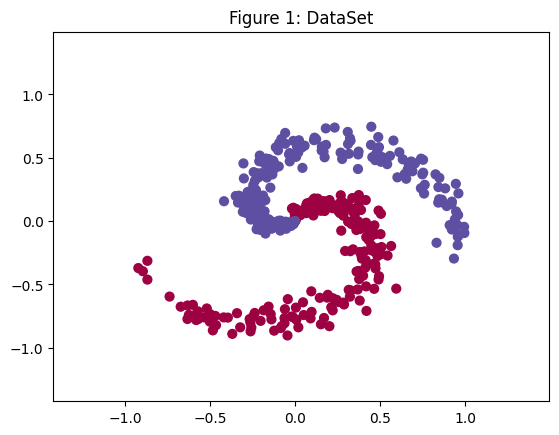

In [3]:
#  TOY DataSet
sample, target = data_generator(N = 200)
# print(target.shape)

### Given Example: Linear Regression


Note that linear regression is usually used for regression tasks, not classification tasks. However, it can be used for binary classification problems (be labeled 0, 1) with a threshold classifier. That is, when linear regression outputs > 0.5, the prediction is 1; otherwise, the prediction is 0. 

In [9]:
# Convert data to PyTorch tensors
X_tensor = torch.from_numpy(sample).float()
y_tensor = torch.from_numpy(target).float()

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size,1)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model, loss function, and optimizer
# input_size = 1  # Number of features in the input data
model = LinearRegressionModel(X_tensor.shape[1])
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 500
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X_tensor)
    y_pred = y_pred.reshape(y_tensor.shape)
    
    # Compute the loss
    loss = criterion(y_pred, y_tensor)

    #Calculate Accuracy
    
    output = torch.where(y_pred>0.5, 1.0,0.0)   
    acc = accuracy_score(y_tensor, output)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {acc}')



Epoch [1/500], Loss: 0.3956, Accuracy: 0.285
Epoch [2/500], Loss: 0.3934, Accuracy: 0.285
Epoch [3/500], Loss: 0.3913, Accuracy: 0.285
Epoch [4/500], Loss: 0.3891, Accuracy: 0.2875
Epoch [5/500], Loss: 0.3871, Accuracy: 0.29
Epoch [6/500], Loss: 0.3850, Accuracy: 0.2925
Epoch [7/500], Loss: 0.3829, Accuracy: 0.295
Epoch [8/500], Loss: 0.3809, Accuracy: 0.2975
Epoch [9/500], Loss: 0.3789, Accuracy: 0.3025
Epoch [10/500], Loss: 0.3770, Accuracy: 0.3025
Epoch [11/500], Loss: 0.3750, Accuracy: 0.305
Epoch [12/500], Loss: 0.3731, Accuracy: 0.305
Epoch [13/500], Loss: 0.3712, Accuracy: 0.305
Epoch [14/500], Loss: 0.3693, Accuracy: 0.31
Epoch [15/500], Loss: 0.3674, Accuracy: 0.31
Epoch [16/500], Loss: 0.3656, Accuracy: 0.31
Epoch [17/500], Loss: 0.3638, Accuracy: 0.31
Epoch [18/500], Loss: 0.3620, Accuracy: 0.3125
Epoch [19/500], Loss: 0.3602, Accuracy: 0.315
Epoch [20/500], Loss: 0.3584, Accuracy: 0.32
Epoch [21/500], Loss: 0.3566, Accuracy: 0.325
Epoch [22/500], Loss: 0.3549, Accuracy: 0.3

/Users/erfanehmahmoudzadeh/miniconda3/envs/deeplearning/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


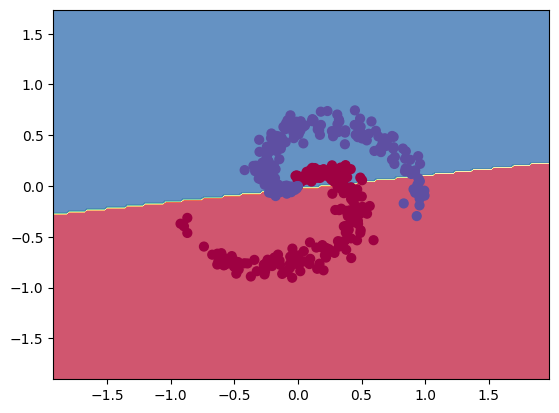

In [10]:
visualize(sample,target, model)

**Here is an example: the green line is the line of the decision boundary. You should draw the linear decision boundary like this.**

#### Given Example: Weights and Bias

You can use weight and bias attributes of your model to find the equation of the decision boundary.

In [73]:
print("Weights: \n",model.linear.weight)
print("Bias: \n",model.linear.bias)

Weights: 
 Parameter containing:
tensor([[-0.1152,  0.5983]], requires_grad=True)
Bias: 
 Parameter containing:
tensor([0.5201], requires_grad=True)


### Logistic Regression

In [ ]:
# implement your logistic regression here

### Deep Linear Neural Network

In [ ]:
# # implement your nonlinear feed forward neural network here

### Deep Neural Network

In [ ]:
# implement your nonlinear feed forward neural network here

### Deep Neural Network with L2-regularization

$\lambda = 0.01, 2, 100$
